# Scripting PlatoSim with Python

The PLATO Simulator resides in the `build` directory at the location where you installed you Github clone. The `platosim` executable is usually started from the unix command prompt and reads the YAML configuration file, produces an HDF5 output file and a log file.

```
$ cd ~/Work/PLATO/Simulations
$ platosim full-frame.yaml full-frame.hdf5 full-frame.log
```

Preparing the YAML configuration file can be cumbersome, especially when running the PLATO simulator in a specific configuration or when looping over different inputs. We have therefore provided a Python environment from which the PlatoSim can be executed and which simplifies the creation and manipulation of the YAML configuration files.

This tutorial tells you the basics of scripting PlatoSim.

### Set up your environment

Set up your python environment before starting the iPython Notebook.

**Environment variables used in the YAML input file**

> `PLATO_PROJECT_HOME` - where the PlatoSim3 is installed (usually a Git clone)

> `PLATO_WORK_DIR` - where you run your simulations

**Environment variables for Python**

> `PYTHONPATH` - `$PLATO_PROJECT_HOME/python` : `$PLATO_WORK_DIR/scripts`

Write the above settings in a Python script called setupEnvironment. That script can then be executed with the `%run` command in all your iPython environments. The `-i` option to the `%run` command executes the script in the iPython namespace, i.e. the environment you are working in. Without the `-i` option, the script is run in an empty namespace.

```
import os, sys

os.environ['PLATO_PROJECT_HOME'] = projectDir
os.environ['PLATO_WORK_DIR'] = workDir

sys.path.append(projectDir + "/python")
```

In [2]:
projectDir = '/Users/rik/Git/PlatoSim3'
workDir = '/Users/rik/Work/PLATO/Simulations'

%run -i setupEnvironment.py

### Import python modules

We want our plots in between the commands and descriptions in this notebook.

In [6]:
%matplotlib inline

In [7]:
%run -i setupMatplotlib.py

In [8]:
import numpy as np
import tables

when the above imports failed, you might need to install one or the other packages into your Python environment.
You can see that there was a failure when there appears a '\*' between the square brackets, i.e. `In [*]`. An error message will be printed either in the Notebook or on the Terminal from which the iPython notebook was started.

### Importing PlatoSim modules

The Simulation object provides easy access to the PlatoSim configuration and runs the `platosim` executable from within your Python environment.

In [9]:
import simulation
from simulation import Simulation

The SimFile object provides easy access to the HDF5 output file and its content.

In [10]:
import simfile
from simfile import SimFile

The referenceFrames module provides all kinds of convenience functions for coordinates transformations and visualisation of the CCD configuration in the sky and in the focal plane.

In [11]:
import referenceFrames
from referenceFrames import *

When the above imports failed, you might need to properly set the location where Python finds the PlatoSim modules.

### Reload Python modules

When you are working on a script you can reload your Python code without the need to exit Python.

In [12]:
from imp import reload

In [13]:
import simulation

In [14]:
reload(simulation)
from simulation import Simulation

## Running a simulation

Before running the PlatoSim from Python, you want to prepare a Simulation. Therefore, construct a Simulation object with a unique name and set the output directory where the HDF5 file and the log file will be saved.

In [15]:
sim = Simulation('Run01', outputDir=workDir)

The output directory can afterwards be changed as follows:

In [16]:
sim.outputDir = workDir

In [17]:
simFile = sim.run()

In [18]:
simFile = sim.run(removeOutputFile=True)

In [19]:
simFile

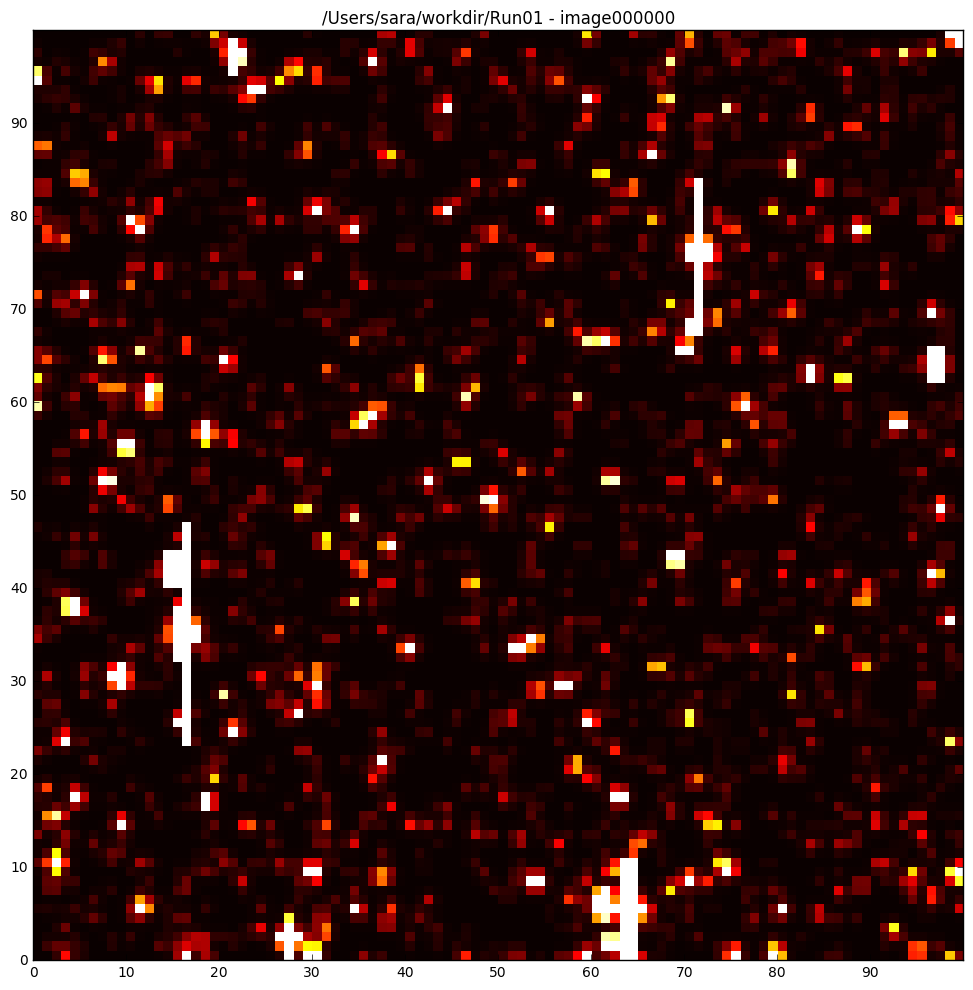

In [20]:
simFile.showImage(0)

In [21]:
starID, rowPix, colPix, xFPmm, yFPmm = simFile.getStarCoordinates(0)

In [22]:
starID


array([13473, 13494, 15192, ..., 23953, 23954, 23960], dtype=uint32)

In [23]:
ra, dec = simFile.getPlatformPointingCoordinates()

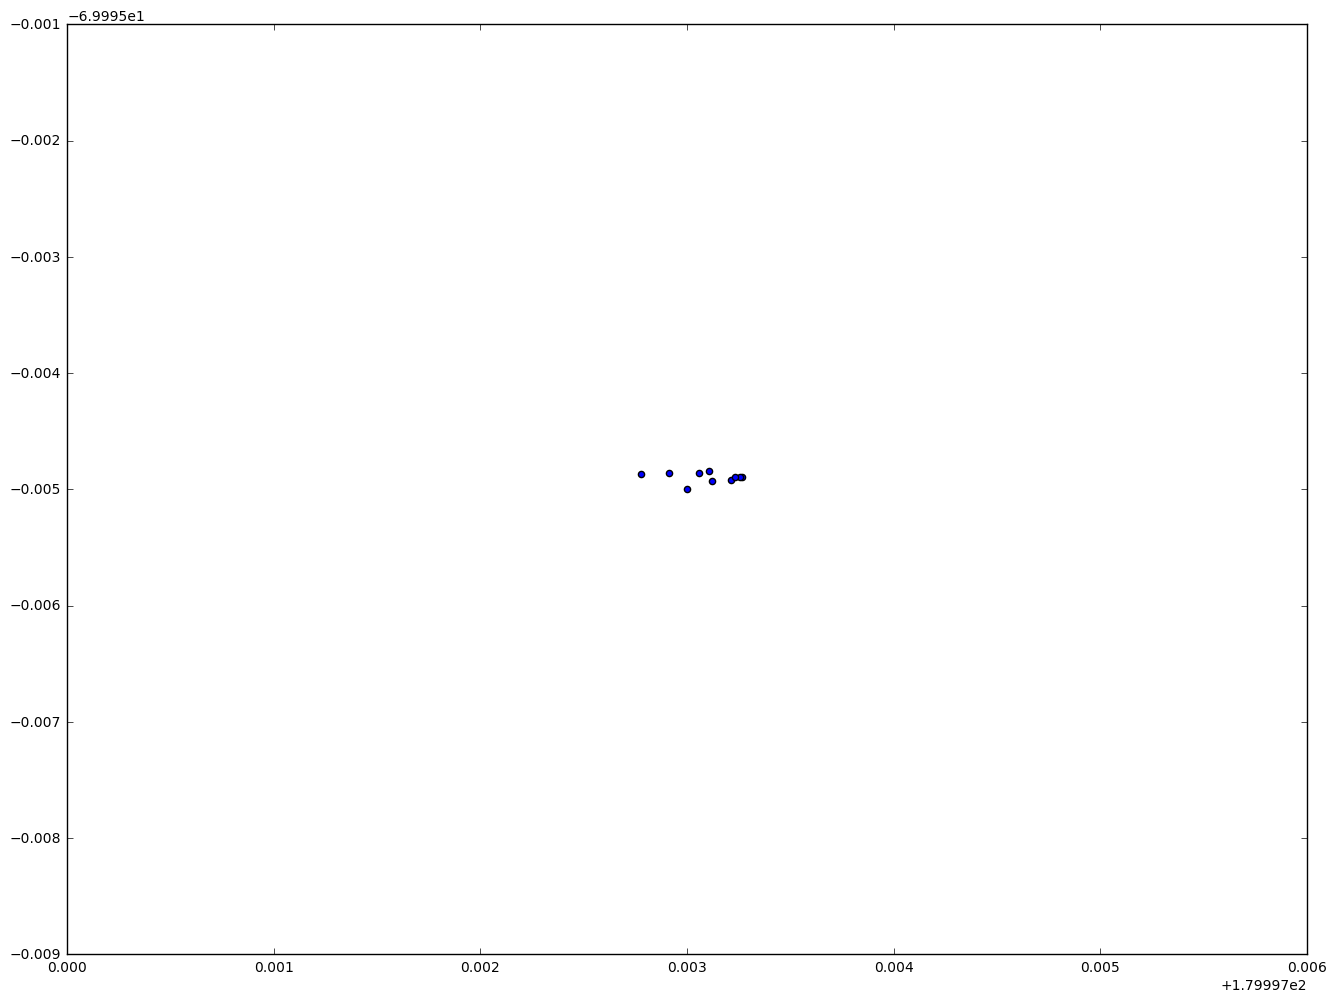

In [24]:
plt.scatter(ra, dec)
